Каирова Екатерина ТФэ-01-21
Домашняя работа 1
задание 2

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: 
 = 5 MPa, 
 = 450 градусов Цельсия, 
 = 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины 
 = 
. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.



In [5]:
import iapws
from iapws import IAPWS97 as gas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa 
to_kelvin = lambda x: x + 273.15 if x else None 

In [7]:
p_0 = 5 * MPa
t_0 = to_kelvin(450)
p_k = np.array([5,10,15,20,50]) * kPa
p_2 = p_k


In [8]:
point_0 = gas(P=p_0 * unit, T=t_0)
h_0 = point_0.h

In [9]:
i=0
h_condenser_inlet = []
while i<len(p_k):
    point_condenser_inlet = gas(P= p_k[i] * unit, s=point_0.s)
    i=i+1
    h_condenser_inlet = np.append(h_condenser_inlet,point_condenser_inlet.h )
print (h_condenser_inlet)

[2079.33842268 2160.26681126 2210.21810158 2246.92152003 2371.48898752]


In [10]:
i=0
h_pump_outlet = []
while i<len(p_k):
    point_pump_outlet = gas(P=p_k[i] * unit, x=0)
    i=i+1
    h_pump_outlet = np.append (h_pump_outlet, point_pump_outlet.h )
print (h_pump_outlet)

[137.76511899 191.81229519 225.93512136 251.39973841 340.47602888]


In [11]:
useful_energy = h_0 - h_condenser_inlet
full_energy = h_0 - h_pump_outlet
efficiency = useful_energy / full_energy

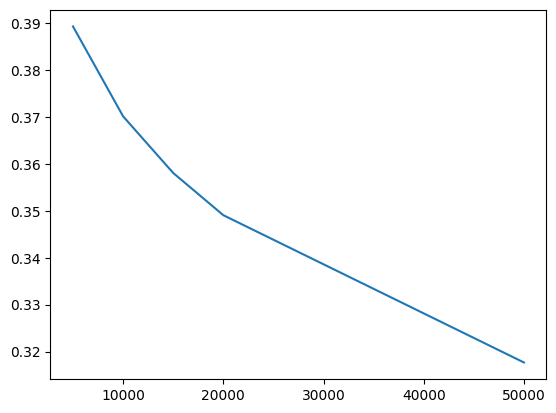

In [12]:
fig, ax = plt.subplots()
ax.plot(p_k,efficiency)